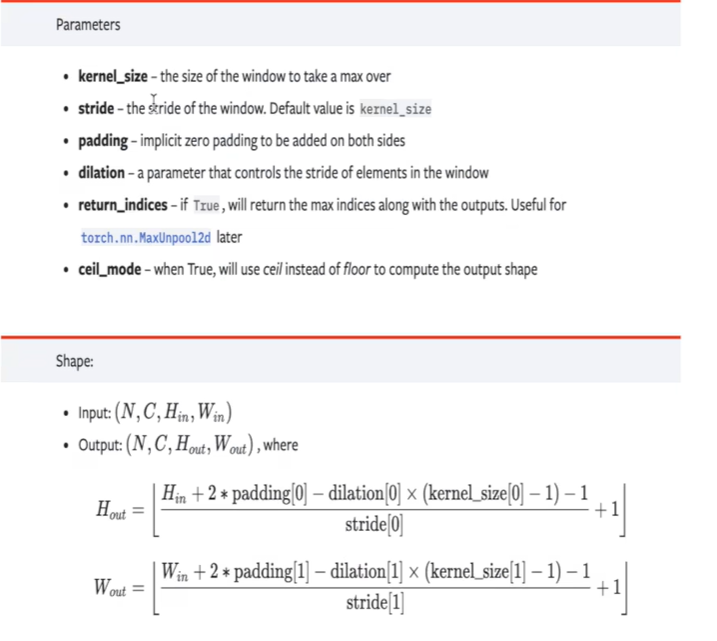

stride不设置的话默认为kernel_size

    空洞卷积
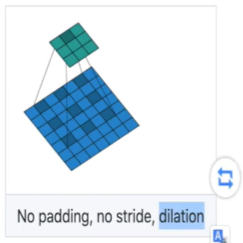

ceil_mode:两种模式，一个向上取整，一个向下取整

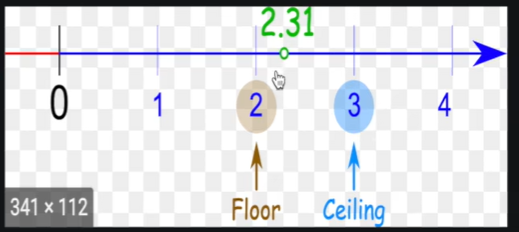

这种情况ceil会保留这六个数
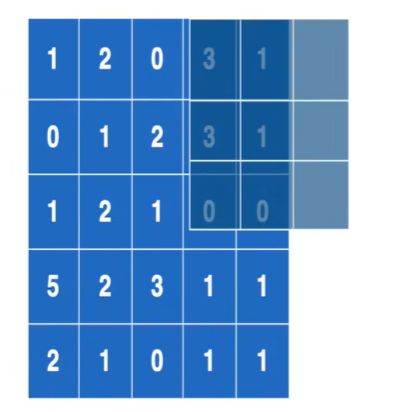

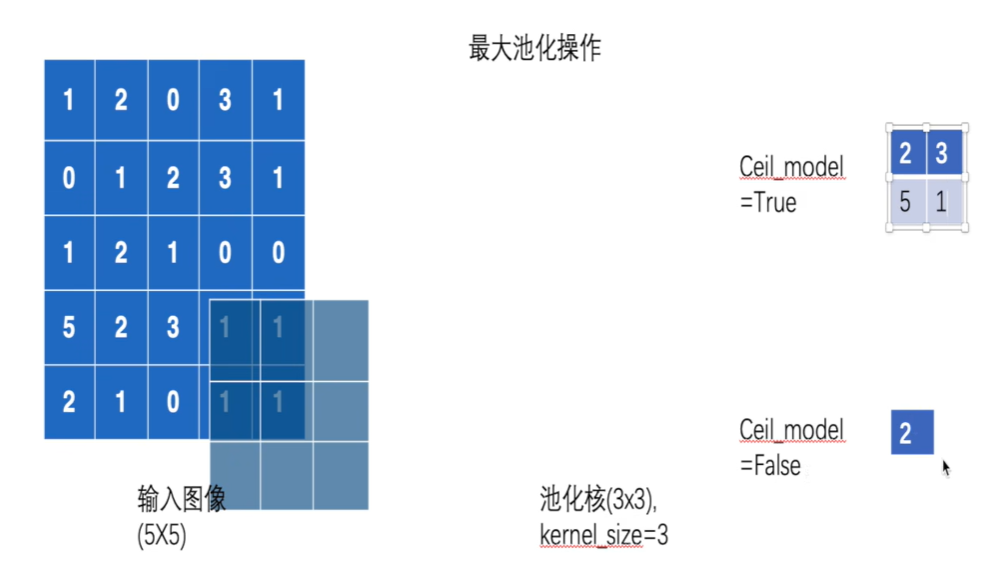

In [3]:
import torch
import torch.nn as nn
from torch.nn import MaxPool2d

input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]], dtype=torch.float32)

input = torch.reshape(input, (-1, 1, 5, 5))
print(input.shape)

class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3)

    def forward(self, input):
        output = self.maxpool1(input)
        return output

tudui = Tudui()
output = tudui(input)
print(output)

torch.Size([1, 1, 5, 5])
tensor([[[[2.]]]])


最大池化：保留图像信息

In [8]:
import torch
import torch.nn as nn
from torch.nn import MaxPool2d
from torch.utils.data import DataLoader
import torchvision

In [9]:
dataset=torchvision.datasets.CIFAR10(root='E:\\深度学习\\小土堆\\数据集',train=False,transform=torchvision.transforms.ToTensor())#download=True)

In [ ]:
dataloader = DataLoader(dataset, batch_size=4)


In [11]:
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3)

    def forward(self, input):
        output = self.maxpool1(input)
        return output

tudui = Tudui()

原始图像的形状: torch.Size([3, 32, 32])
输入到网络的图像形状: torch.Size([1, 3, 32, 32])
池化后图像的形状: torch.Size([1, 3, 10, 10])


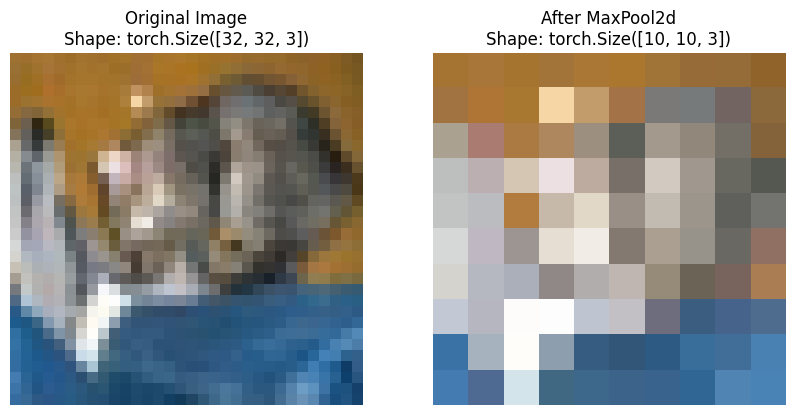

In [13]:
import torch
import torch.nn as nn
from torch.nn import MaxPool2d
import torchvision
from torchvision import transforms # 导入 transforms 模块
import matplotlib.pyplot as plt

# 1. 定义图像预处理步骤
# ToTensor() 会将 PIL Image 或 NumPy 数组转换为 Tensor，并将像素值从 [0, 255] 缩放到 [0.0, 1.0]
transform = transforms.Compose([
    transforms.ToTensor()
])

# 2. 加载数据集
# 为了代码可复现，这里将路径改为 './data' 并允许自动下载
# 你的原始路径 'E:\\深度学习\\小土堆\\数据集' 也可以正常使用
dataset=torchvision.datasets.CIFAR10(root='E:\\深度学习\\小土堆\\数据集',train=False,transform=torchvision.transforms.ToTensor())#download=True)
# 3. 从数据集中取出一张图像用于演示
# dataset[i] 会返回第 i 张图像的数据和它的标签
img, label = dataset[0]
print(f"原始图像的形状: {img.shape}") # 输出应为 [3, 32, 32] (C, H, W)

# 4. 调整图像维度以输入到网络中
# MaxPool2d 需要4维输入 (N, C, H, W)，其中 N 是批量大小
# 我们使用 unsqueeze(0) 在最前面增加一个维度
img_input = img.unsqueeze(0)
print(f"输入到网络的图像形状: {img_input.shape}") # 输出应为 [1, 3, 32, 32]

# 定义你的网络结构
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        # kernel_size=3, 池化核大小为3x3
        self.maxpool1 = MaxPool2d(kernel_size=3, ceil_mode=False)

    def forward(self, input):
        output = self.maxpool1(input)
        return output

# 实例化模型并执行池化操作
tudui = Tudui()
img_pooled = tudui(img_input)
print(f"池化后图像的形状: {img_pooled.shape}") # 输出应为 [1, 3, 10, 10]

# 5. 准备图像用于 matplotlib 显示
# imshow 需要 (H, W, C) 格式，所以需要用 permute 调换维度
# 同时，池化后的张量是4维的，需要用 squeeze() 去掉批次维度
img_for_show = img.permute(1, 2, 0)
img_pooled_for_show = img_pooled.squeeze(0).permute(1, 2, 0)

# 6. 使用 matplotlib 显示图像
plt.figure(figsize=(10, 5)) # 设置画布大小

# 显示池化前的图像
plt.subplot(1, 2, 1) # 1行2列的第1个位置
plt.title(f'Original Image\nShape: {img_for_show.shape}')
plt.imshow(img_for_show)
plt.axis('off') # 关闭坐标轴

# 显示池化后的图像
plt.subplot(1, 2, 2) # 1行2列的第2个位置
plt.title(f'After MaxPool2d\nShape: {img_pooled_for_show.shape}')
# 注意：池化后的张量可能仍然在计算图中，使用 detach() 将其分离
plt.imshow(img_pooled_for_show.detach().numpy())
plt.axis('off') # 关闭坐标轴

plt.show() # 显示图像

Files already downloaded and verified


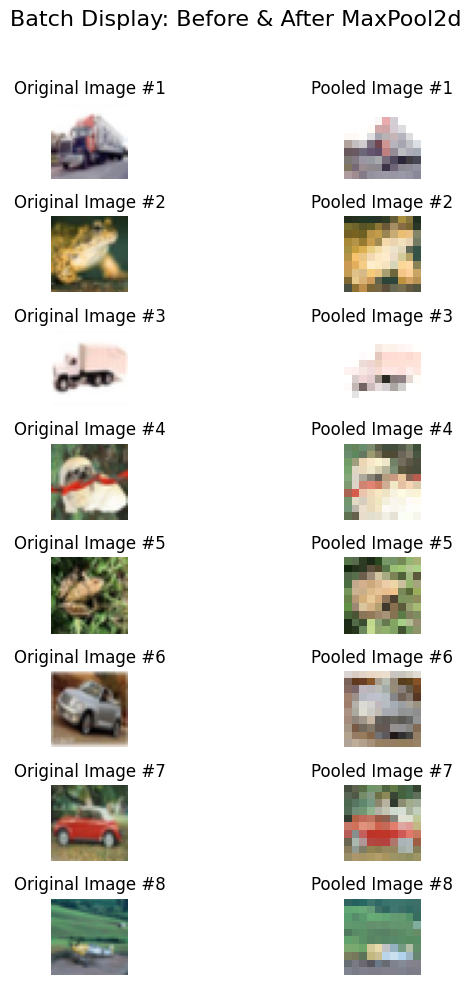

: 

In [ ]:
import torch
import torch.nn as nn
from torch.nn import MaxPool2d
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader # 导入 DataLoader
import matplotlib.pyplot as plt

# 1. 定义图像预处理步骤
transform = transforms.Compose([
    transforms.ToTensor()
])

# 2. 加载数据集
dataset = torchvision.datasets.CIFAR10(root='E:\\深度学习\\小土堆\\数据集', train=False, transform=transform, download=True)

# 3. 创建 DataLoader 来加载一个批次的数据
# 我们从 DataLoader 中获取一个批次，而不是只取一张图片
batch_size = 16 # 可以设置任意大小的批次
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 获取一个批次的图像数据
imgs_batch, _ = next(iter(dataloader)) # imgs_batch 的形状是 [16, 3, 32, 32]

# 定义你的网络结构 (与之前相同)
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3, ceil_mode=False)

    def forward(self, input):
        output = self.maxpool1(input)
        return output

# 实例化模型并对整个批次执行池化操作
tudui = Tudui()
imgs_pooled_batch = tudui(imgs_batch) # pooled_batch 的形状是 [16, 3, 10, 10]

# --- 4. 修改可视化逻辑以显示批次中的前几张图片 ---

# 设置要显示的图片数量（例如批次中的前4张）
num_to_show = 8

# 创建一个足够大的画布来容纳所有子图
# 我们将创建 num_to_show 行，每行2列（原图 vs 池化图）
plt.figure(figsize=(8, 10)) # 调整画布大小以适应多行
plt.suptitle('Batch Display: Before & After MaxPool2d', fontsize=16)

# 循环遍历要显示的每张图片
for i in range(num_to_show):
    # --- 显示池化前的图像 ---
    ax = plt.subplot(num_to_show, 2, i * 2 + 1)
    # 从批次中取出第 i 张图并准备显示
    original_img_to_show = imgs_batch[i].permute(1, 2, 0)
    plt.imshow(original_img_to_show)
    ax.set_title(f'Original Image #{i+1}')
    plt.axis('off')

    # --- 显示池化后的图像 ---
    ax = plt.subplot(num_to_show, 2, i * 2 + 2)
    # 从池化后的批次中取出第 i 张图并准备显示
    pooled_img_to_show = imgs_pooled_batch[i].permute(1, 2, 0)
    plt.imshow(pooled_img_to_show.detach().numpy())
    ax.set_title(f'Pooled Image #{i+1}')
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96]) # 调整布局以适应总标题
plt.show() # 显示图像